In [2]:
import pandas as pd
import random
import math
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from pulp import *

In [25]:
original_df1 = pd.read_excel("dataset.xlsx",header=0) 

In [118]:
original_df1 = original_df1.fillna(0)

In [5]:

original_df = original_df1.sample(500)
data_index = original_df.index



In [6]:
original_df=original_df.reset_index(drop=True)
new_data_index = original_df.index
print(new_data_index)
data_tuples = list(zip(data_index,new_data_index))
match=pd.DataFrame(data_tuples, columns=['Old','New'])


RangeIndex(start=0, stop=500, step=1)


In [7]:
productVariables = pulp.LpVariable.dicts("aliment",(product for product in original_df.index),lowBound=0,upBound = 20)

In [8]:
epsVariables = pulp.LpVariable.dicts("epsilon",(i for i in range(4)),lowBound=1,upBound = 20)

In [9]:
 
#utility 1
marginalVariables1 = pulp.LpVariable.dicts("u_1",(row for row in original_df['energy100g']),lowBound=0,upBound = 20)
 
#utility 2
marginalVariables2 = pulp.LpVariable.dicts("u_2",(row for row in original_df['saturatedfat100g']),lowBound=0,upBound = 20)
#utility 3
marginalVariables3 = pulp.LpVariable.dicts("u_3",(row for row in original_df['sugars100g']),lowBound=0,upBound = 20)
#utility 4
marginalVariables4 = pulp.LpVariable.dicts("u_4",(row for row in original_df['fiber100g']),lowBound=0,upBound = 20)
#utility 5
marginalVariables5 = pulp.LpVariable.dicts("u_5",(row for row in original_df['proteins100g']),lowBound=0,upBound = 20)
#utility 6
marginalVariables6 = pulp.LpVariable.dicts("u_6",(row for row in original_df['sodium100g']),lowBound=0,upBound = 20)


In [10]:
model = pulp.LpProblem("NutriScore",LpMaximize)

In [11]:
# objective function
model += pulp.lpSum(epsVariables)

In [12]:
#constraints associated to global utility of each food
for product in original_df.index:
    energy = original_df['energy100g'].iloc[product]
    saturatedfat = original_df['saturatedfat100g'].iloc[product]
    sugars = original_df['sugars100g'].iloc[product]
    fiber = original_df['fiber100g'].iloc[product]
    proteins = original_df['proteins100g'].iloc[product]
    sodium = original_df['sodium100g'].iloc[product]
    model += marginalVariables1[energy] + marginalVariables2[saturatedfat] + marginalVariables3[sugars] + marginalVariables4[fiber] + marginalVariables5[proteins] + marginalVariables6[sodium]  == productVariables[product]


In [13]:
# set preferences
grade_A = []
grade_B = []
grade_C = []
grade_D = []
grade_E = []
for index in range(len(original_df['nutriscoregrade'])):
    nutri_grade = original_df['nutriscoregrade'][index]
    if (nutri_grade == 'a'):
        grade_A.append(index)
    else:
        if (nutri_grade == 'b'):
            grade_B.append(index)   
        else:
            if (nutri_grade == 'c'):
                grade_C.append(index)  
            
            else:
                if (nutri_grade == 'd'):
                    grade_D.append(index)
                else:
                    if (nutri_grade == 'e'):
                        grade_E.append(index)
                        
pref_A = random.sample(grade_A, math.ceil(len(grade_A)*0.1))
pref_B = random.sample(grade_B, math.ceil(len(grade_B)*0.1))
pref_C = random.sample(grade_C, math.ceil(len(grade_C)*0.1))
pref_D = random.sample(grade_D, math.ceil(len(grade_D)*0.1))
pref_E = random.sample(grade_E, math.ceil(len(grade_E)*0.1))

In [14]:
for a in pref_A:
    for b in pref_B:
        model += productVariables[b] + epsVariables[0] <= productVariables[a]  
for b in pref_B:
    for c in pref_C:
        model += productVariables[c] + epsVariables[1] <= productVariables[b]
for c in pref_C:
    for d in pref_D:
        model += productVariables[d] + epsVariables[2] <= productVariables[c]
for d in pref_D:
    for e in pref_E:
        model += productVariables[e] + epsVariables[3] <= productVariables[d]

In [15]:
#Monotonicity constraints
energy = original_df["energy100g"].sort_values(ascending=False)
ordered1 = []
for x in energy:
    ordered1.append(marginalVariables1[x])

energy = original_df["energy100g"].sort_values(ascending=False)
ordered1 = []
for x in energy:
    ordered1.append(marginalVariables1[x])

saturatedfat = original_df["saturatedfat100g"].sort_values(ascending=False)
ordered2 = []
for x in saturatedfat:
    ordered2.append(marginalVariables2[x])
    
sugars = original_df["sugars100g"].sort_values(ascending=False)
ordered3 = []
for x in sugars:
    ordered3.append(marginalVariables3[x])

fiber = original_df["fiber100g"].sort_values(ascending=True)
ordered4 = []
for x in fiber:
    ordered4.append(marginalVariables4[x])

proteins = original_df["proteins100g"].sort_values(ascending=True)
ordered5 = []
for x in proteins:
    ordered5.append(marginalVariables5[x])
    
sodium = original_df["sodium100g"].sort_values(ascending=False)
ordered6 = []
for x in sodium:
    ordered6.append(marginalVariables6[x])





In [16]:
for i in range (len(ordered1)-1):
    model += ordered1[i] <= ordered1[i+1]
    model += ordered2[i] <= ordered2[i+1]
    model += ordered3[i] <= ordered3[i+1]
    model += ordered4[i] <= ordered4[i+1]
    model += ordered5[i] <= ordered5[i+1]
    model += ordered6[i] <= ordered6[i+1]
    

In [17]:
model.solve()

status = LpStatus[model.status]
print(status)

Optimal


In [18]:
for v in model.variables():
    print(v.name, "=", v.varValue)


# The optimised objective function value is printed to the screen
print("Value of objectiove function = ", value(model.objective))

aliment_0 = 11.580247
aliment_1 = 5.9728395
aliment_10 = 14.561728
aliment_100 = 17.382716
aliment_101 = 18.630864
aliment_102 = 13.965432
aliment_103 = 13.77037
aliment_104 = 14.634568
aliment_105 = 13.541975
aliment_106 = 12.662963
aliment_107 = 14.139506
aliment_108 = 11.64321
aliment_109 = 12.323457
aliment_11 = 16.975309
aliment_110 = 14.974074
aliment_111 = 13.323457
aliment_112 = 17.562963
aliment_113 = 9.9876543
aliment_114 = 12.323457
aliment_115 = 16.659259
aliment_116 = 13.323457
aliment_117 = 13.197531
aliment_118 = 18.922222
aliment_119 = 11.196296
aliment_12 = 11.459259
aliment_120 = 12.323457
aliment_121 = 10.560494
aliment_122 = 12.07037
aliment_123 = 13.323457
aliment_124 = 19.553086
aliment_125 = 13.323457
aliment_126 = 14.139506
aliment_127 = 15.139506
aliment_128 = 11.166667
aliment_129 = 17.75679
aliment_13 = 13.323457
aliment_130 = 13.323457
aliment_131 = 18.339506
aliment_132 = 14.119753
aliment_133 = 11.17284
aliment_134 = 9.4530864
aliment_135 = 17.804938
alime

In [19]:
print(productVariables)

{0: aliment_0, 1: aliment_1, 2: aliment_2, 3: aliment_3, 4: aliment_4, 5: aliment_5, 6: aliment_6, 7: aliment_7, 8: aliment_8, 9: aliment_9, 10: aliment_10, 11: aliment_11, 12: aliment_12, 13: aliment_13, 14: aliment_14, 15: aliment_15, 16: aliment_16, 17: aliment_17, 18: aliment_18, 19: aliment_19, 20: aliment_20, 21: aliment_21, 22: aliment_22, 23: aliment_23, 24: aliment_24, 25: aliment_25, 26: aliment_26, 27: aliment_27, 28: aliment_28, 29: aliment_29, 30: aliment_30, 31: aliment_31, 32: aliment_32, 33: aliment_33, 34: aliment_34, 35: aliment_35, 36: aliment_36, 37: aliment_37, 38: aliment_38, 39: aliment_39, 40: aliment_40, 41: aliment_41, 42: aliment_42, 43: aliment_43, 44: aliment_44, 45: aliment_45, 46: aliment_46, 47: aliment_47, 48: aliment_48, 49: aliment_49, 50: aliment_50, 51: aliment_51, 52: aliment_52, 53: aliment_53, 54: aliment_54, 55: aliment_55, 56: aliment_56, 57: aliment_57, 58: aliment_58, 59: aliment_59, 60: aliment_60, 61: aliment_61, 62: aliment_62, 63: aliment

In [27]:
original_df1['index1'] = original_df1.index

In [29]:
print(original_df1['index1'])

0          0
1          1
2          2
3          3
4          4
        ... 
5600    5600
5601    5601
5602    5602
5603    5603
5604    5604
Name: index1, Length: 5605, dtype: int64


In [166]:
merged = pd.merge(match, original_df1, left_on='Old', right_on='index1', how='left').drop('index1', axis=1)

In [167]:
print(merged)

      Old  New                                        productname  \
0    1655    0                                      Pomme Pruneau   
1    4228    1                           Beurre de baratte - Doux   
2    3369    2                            Eau Finement Petillante   
3     730    3                          Creme de marrons vanillee   
4    1983    4  Sans sucres ajoutes * *Contient des sucres nat...   
..    ...  ...                                                ...   
495  5487  495                           Huile d'olive vierge bio   
496  1944  496                     Bechamel a  la noix de muscade   
497  5010  497  Nouilles Chinoises a  la farine de ble tendre ...   
498   340  498                          Queues de gambas sauvages   
499  2221  499  Filet d'anchois roules aux capres a  l'huile d...   

    nutriscoregrade  energy100g  saturatedfat100g  sugars100g  fiber100g  \
0                 b       515.0               0.1        29.0        0.0   
1                 e

In [171]:
merged_mod = merged.drop(['Old'], axis=1)
merged_mod = merged_mod.drop(['New'], axis=1)
o_df_mod = original_df1.drop(['index1'],axis=1)


                               productname nutriscoregrade  energy100g  \
0     Les evasions Poulet Satay et son riz               b       590.0   
1                       Veloute de Legumes               b      1477.0   
2                             jus de pomme               c       176.0   
3                             Profiteroles               c      1126.0   
4                   Jambon Sec de Montagne               d      1004.0   
...                                    ...             ...         ...   
5600               Chips Maxi Crok Classic               c      2242.0   
5601              Huile pimentee Carrefour               d      3425.0   
5602                        Riz long grain               a      1498.0   
5603                        Riz long grain               a      1458.0   
5604                   Saumon sauvage fume               d       492.0   

      saturatedfat100g  sugars100g  fiber100g  proteins100g  sodium100g  \
0                  0.5         5.5  

In [172]:
unlabeled = pd.concat([o_df_mod,merged_mod]).drop_duplicates(keep=False)
unlabeled_rows = len(unlabeled.index)
print(unlabeled_rows)

4686


In [174]:

scores = np.zeros(500)
new_nutri_grade = [''] * 500
utility1={}
utility2={}
utility3={}
utility4={}
utility5={}
utility6={}
for v in model.variables():
    v_name=v.name.split("_")
    if(v_name[0] == 'aliment'):
        i = int(v_name[1])
        scores[i] = v.varValue
        if (v.varValue >= 17):
            new_nutri_grade[i] = 'a'
        else:
            if (v.varValue >= 13):
                new_nutri_grade[i] = 'b'
            else:
                if (v.varValue >= 9):
                    new_nutri_grade[i] = 'c'
                else:
                    if (v.varValue >= 5):
                        new_nutri_grade[i] = 'd'
                    else:
                        new_nutri_grade[i] = 'e'
    else:
        if (v_name[0]=='u'):
            # utility variables
            u = v_name[1]
            u_val = v_name[2]
            if (u == '1'):
                utility1[u_val]= v.varValue
            else:
                if (u =='2'):
                    utility2[u_val]= v.varValue
                else:
                    if(u=='3'):
                        utility3[u_val]= v.varValue
                    else:
                        if (u=='4'):
                            utility4[u_val]= v.varValue
                        else: 
                            if (u =='5'):
                                utility5[u_val]= v.varValue
                            else:
                                if (u=='6'):
                                    utility6[u_val]= v.varValue
         

In [175]:
merged['new_scores']=scores

In [176]:
merged['new_nutri_grades']=new_nutri_grade

In [177]:
merged_u1 = []
merged_u2 = []
merged_u3 = []
merged_u4 = []
merged_u5 = []
merged_u6 = []
for e in merged['energy100g']:
    x=utility1.get(str(e),0)
    merged_u1.append(x)
    
for f in merged['saturatedfat100g']:
    x=utility2.get(str(f),0)
    merged_u2.append(x)
        
for s in merged['sugars100g']:
    x=utility3.get(str(s),0)
    merged_u3.append(x)

for fb in merged['fiber100g']:
    x=utility4.get(str(fb),0)
    merged_u4.append(x)
        
for p in merged['proteins100g']:
    x=utility5.get(str(p),0)
    merged_u5.append(x)

for sd in merged['sodium100g']:
    x=utility6.get(str(sd),0)
    merged_u6.append(x)


In [178]:
merged['utility_1']=merged_u1
merged['utility_2']=merged_u2
merged['utility_3']=merged_u3
merged['utility_4']=merged_u4
merged['utility_5']=merged_u5
merged['utility_6']=merged_u6


In [179]:
merged.to_csv('model_results.csv',index=False)

In [180]:
#confusion_matrix

CF = {'a':{'a':0,'b':0,'c':0,'d':0,'e':0},
    'b':{'a':0,'b':0,'c':0,'d':0,'e':0},
    'c':{'a':0,'b':0,'c':0,'d':0,'e':0},
    'd':{'a':0,'b':0,'c':0,'d':0,'e':0},
    'e':{'a':0,'b':0,'c':0,'d':0,'e':0}}

In [181]:
merged = merged.fillna(0)
for index, row in merged.iterrows():
    if (row['nutriscoregrade'] == 0 or row['new_nutri_grades'] == 0):
        continue
    else:
        CF[row['nutriscoregrade']][row['new_nutri_grades']] += 1


In [182]:
#calculation precision, recall, F-measure
FP = {'a':0,'b':0,'c':0,'d':0,'e':0}
TP = {'a':0,'b':0,'c':0,'d':0,'e':0}
FN = {'a':0,'b':0,'c':0,'d':0,'e':0}

for i in CF:
    for j in CF[i]:
        if i == j:
            TP[i] = CF[i][j]
        else:
            FP[i] += CF[i][j]
            FN[j] += CF[i][j]
            
Prec = {'a':0,'b':0,'c':0,'d':0,'e':0}
Rec = {'a':0,'b':0,'c':0,'d':0,'e':0}
F1 = {'a':0,'b':0,'c':0,'d':0,'e':0}

for i in Prec:
    Prec[i] = TP[i] / (TP[i] + FP[i])
    Rec[i] = TP[i] / (TP[i] + FN[i])
    F1[i] = 2 * Prec[i] * Rec[i] / (Prec[i] + Rec[i])

print(Prec)

{'a': 0.7111111111111111, 'b': 0.717948717948718, 'c': 0.12903225806451613, 'd': 0.041379310344827586, 'e': 0.06451612903225806}


In [183]:
#calculate Eucledian distance
def distance(x,y):
    dist = np.sqrt(np.sum([(a-b)*(a-b) for a, b in zip(x, y)]))  
    return dist

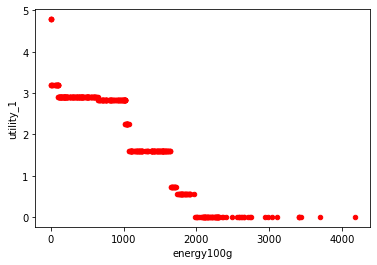

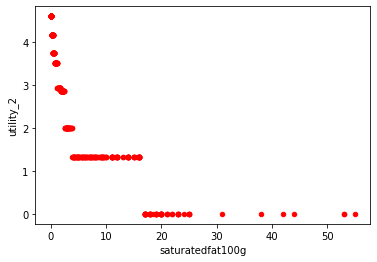

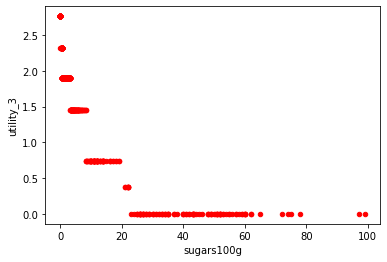

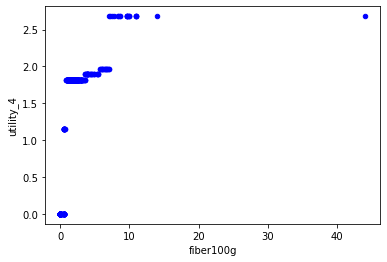

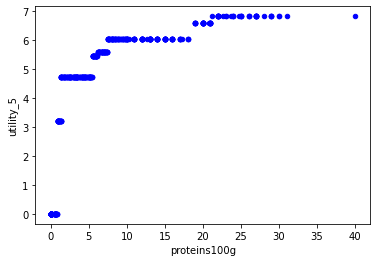

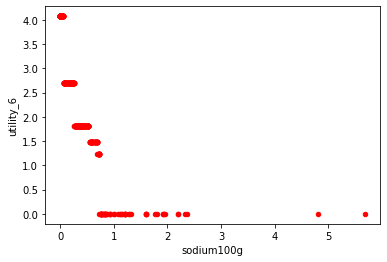

In [184]:
merged.plot(kind='scatter',x='energy100g',y='utility_1',color='red')
plt.show()
merged.plot(kind='scatter',x='saturatedfat100g',y='utility_2',color='red')
plt.show()
merged.plot(kind='scatter',x='sugars100g',y='utility_3',color='red')
plt.show()
merged.plot(kind='scatter',x='fiber100g',y='utility_4',color='blue')
plt.show()
merged.plot(kind='scatter',x='proteins100g',y='utility_5',color='blue')
plt.show()
merged.plot(kind='scatter',x='sodium100g',y='utility_6',color='red')
plt.show()


In [ ]:
unlabeled = unlabeled.reset_index()

In [192]:

max_dist  = [1000000000] * unlabeled_rows
labels  = [-1] * unlabeled_rows
for index, row in unlabeled.iterrows():
    x = pd.Series([row['energy100g'],row['saturatedfat100g'],row['sugars100g'],row['fiber100g'],row['proteins100g'],row['sodium100g']])
    for i, m_row in merged.iterrows():
        y = pd.Series([m_row['utility_1'],m_row['utility_2'],m_row['utility_3'],m_row['utility_4'],m_row['utility_5'],m_row['utility_6']])
        dist = distance(x,y)
        if (max_dist[index]>=dist):
            max_dist[index]=dist
            labels[index]=m_row['new_nutri_grades']

print(labels)
            
            


['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'a', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'd', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'e', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b',

In [193]:
unlabeled['new_nutri_grade']=labels

In [194]:
unlabeled.to_csv('label_prediction.csv',index=False)